 # Overview do projeto
<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

 Projeto de análise de dados em uma clínica médica que deseja desenvolver um modelo capaz de prever a ocorrência de doenças cardíacas em pacientes.


# Coleta de dados

## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.



* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv')

## Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

# Exploração Inicial

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
for coluna in df.columns:
  print('Elementos únicos da coluna:', coluna)
  print(df[coluna].unique().tolist())
  print('\n\n')

Elementos únicos da coluna: age
[63.0, 67.0, 37.0, 41.0, 56.0, 62.0, 57.0, 53.0, 44.0, 52.0, 48.0, 54.0, 49.0, 64.0, 58.0, 60.0, 50.0, 66.0, 43.0, 40.0, 69.0, 59.0, 42.0, 55.0, 61.0, 65.0, 71.0, 51.0, 46.0, 45.0, 39.0, 68.0, 47.0, 34.0, 35.0, 29.0, 70.0, 77.0, 38.0, 74.0, 76.0]



Elementos únicos da coluna: sex
[1.0, 0.0]



Elementos únicos da coluna: cp
[1.0, 4.0, 3.0, 2.0]



Elementos únicos da coluna: trestbps
[145.0, 160.0, 120.0, 130.0, 140.0, 172.0, 150.0, 110.0, 132.0, 117.0, 135.0, 112.0, 105.0, 124.0, 125.0, 142.0, 128.0, 170.0, 155.0, 104.0, 180.0, 138.0, 108.0, 134.0, 122.0, 115.0, 118.0, 100.0, 200.0, 94.0, 165.0, 102.0, 152.0, 101.0, 126.0, 174.0, 148.0, 178.0, 158.0, 192.0, 129.0, 144.0, 123.0, 136.0, 146.0, 106.0, 156.0, 154.0, 114.0, 164.0]



Elementos únicos da coluna: chol
[233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268.0, 354.0, 254.0, 203.0, 192.0, 294.0, 256.0, 263.0, 199.0, 168.0, 239.0, 275.0, 266.0, 211.0, 283.0, 284.0, 224.0, 206.0, 219.0, 340.0, 226.0, 247.

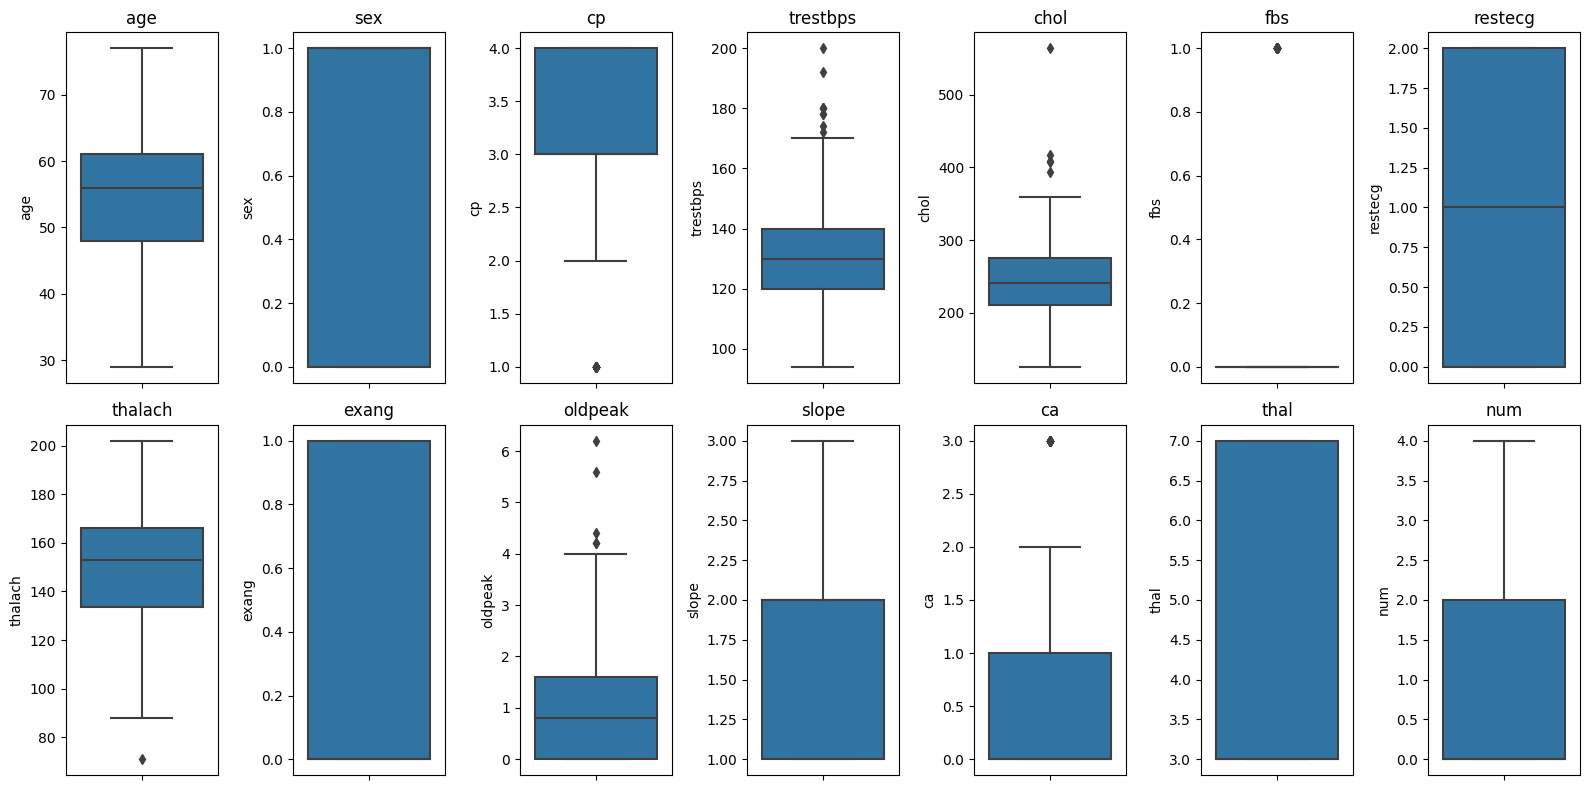

In [8]:
# Boxplots das colunas de df
plt.figure(figsize=(16, 8))
for i, coluna in enumerate(df.columns):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(y=df[coluna])
    plt.title(coluna)
plt.tight_layout()
plt.show()

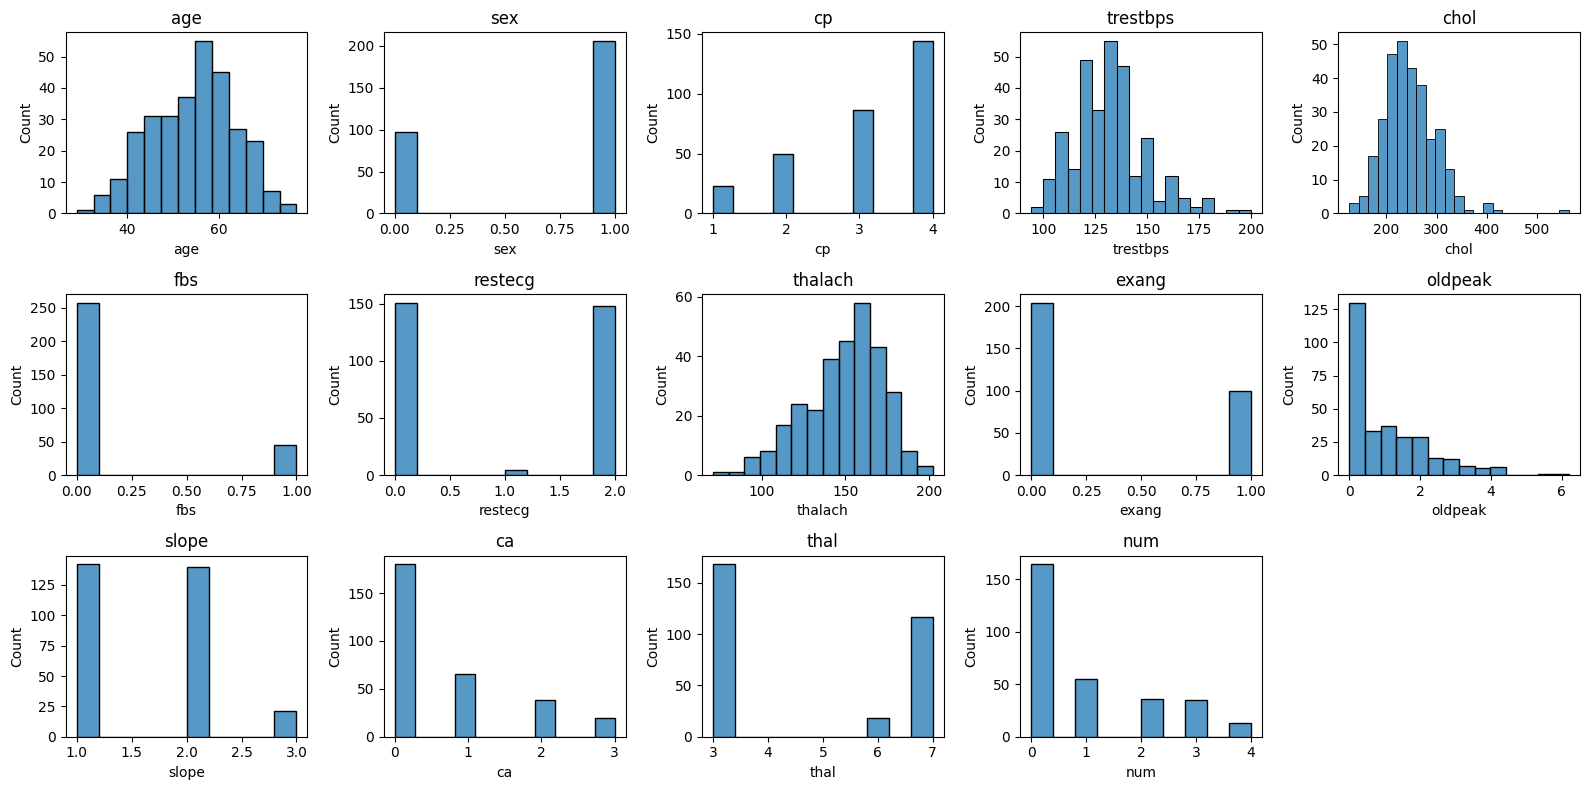

In [9]:
# Histogramas das colunas de df
plt.figure(figsize=(16, 8))
for i, coluna in enumerate(df.columns):
  plt.subplot(3, 5, i+1)
  sns.histplot(data=df, x=coluna)
  plt.title(coluna)
plt.tight_layout()
plt.show()

# Limpeza e Pré-processamento

In [10]:
df_tratado = df.copy()

In [11]:
df_tratado.drop_duplicates(inplace=True)

In [12]:
# Tratamento de outliers com método z-score
from scipy import stats
limite = 3

z_scores_trestbps = stats.zscore(df_tratado['trestbps'])
outliers_trestbps = df_tratado.loc[abs(z_scores_trestbps) > limite]

z_scores_chol = stats.zscore(df_tratado['chol'])
outliers_chol = df_tratado.loc[abs(z_scores_chol) > limite]

z_scores_thalach = stats.zscore(df_tratado['thalach'])
outliers_thalach = df_tratado.loc[abs(z_scores_thalach) > limite]

outliers_somados = (outliers_trestbps+outliers_chol+outliers_thalach)
print(len(outliers_somados)/len(df_tratado) * 100,'% de outliers para cols_zscore')

2.31023102310231 % de outliers para cols_zscore


In [13]:
outliers_somados.index

Int64Index([48, 121, 126, 152, 181, 188, 245], dtype='int64')

In [14]:
cols_zscore = ['trestbps', 'chol', 'thalach']
for coluna in cols_zscore:
  media = df_tratado[coluna].mean()
  df_tratado.loc[outliers_somados.index, coluna] = media

In [15]:
# Tratamento de outliers com método IQR
Q1 = df_tratado['oldpeak'].quantile(0.25)
Q3 = df_tratado['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

moda = df_tratado['oldpeak'].mode()[0]
df_tratado.loc[(df_tratado['oldpeak']<limite_inferior) | (df_tratado['oldpeak']>limite_superior),'oldpeak'] = moda

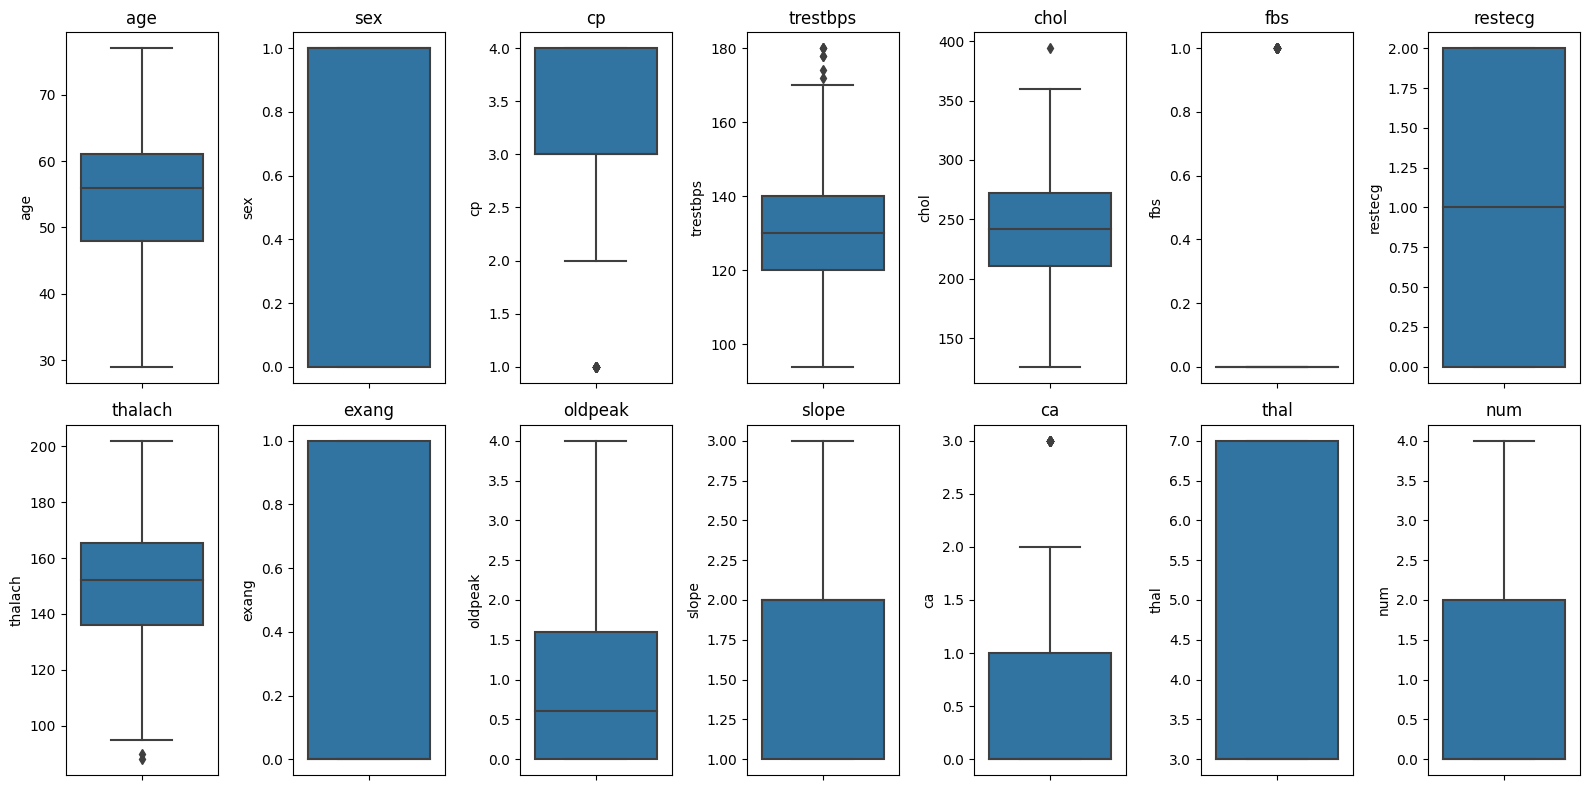

In [16]:
# Boxplots das colunas pós tratamentos
plt.figure(figsize=(16, 8))
for i, coluna in enumerate(df_tratado.columns):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(y=df_tratado[coluna])
    plt.title(coluna)
plt.tight_layout()
plt.show()

In [17]:
df_tratado.loc[df_tratado['num']>1, 'num'] = 1

In [18]:
df_tratado['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

In [19]:
# Separação das variáveis independentes (X) e variável dependente (y)
X = df_tratado.drop(columns='num')
y = df_tratado['num']

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)
X = pd.DataFrame(X_padronizado, columns=X.columns)


# Modelagem

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [23]:
acuracia = metrics.accuracy_score(y_test, y_pred)
precisao = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print('acurácia:',acuracia)
print('precisão:',precisao)
print('recall:',recall)

acurácia: 0.8688524590163934
precisão: 0.8666666666666667
recall: 0.8666666666666667
